In [399]:
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
import os
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras.layers import  Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.activations import softmax, relu
from tensorflow.keras.utils import normalize
import cv2
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [400]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [401]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [402]:
num_classes = 10
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


In [403]:
# val = []
# for i in range(int(x_train)):
#     val[i] = x_train[i]*0.3
#     val.append(val[i])
# print(val)
# print(x_train)
# val_size = int(len(x_train)*.2)

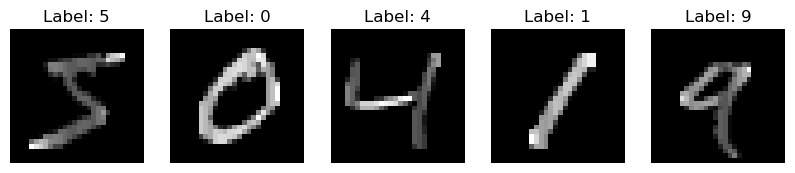

In [404]:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [405]:
model = tf.keras.Sequential()

In [406]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [407]:
optimizer_1 = keras.optimizers.Adam(learning_rate=0.01)
model.compile( optimizer= optimizer_1, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [408]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 784)               0         
                                                                 
 dense_69 (Dense)            (None, 128)               100480    
                                                                 
 dense_70 (Dense)            (None, 128)               16512     
                                                                 
 dense_71 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [409]:
logdir = "log"
callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [410]:
hist = model.fit(x_train, y_train, epochs=10,callbacks= callback)

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2532 - accuracy: 0.9245
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1733 - accuracy: 0.9513
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1477 - accuracy: 0.9599
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1340 - accuracy: 0.9642
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1138 - accuracy: 0.9689
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1084 - accuracy: 0.9708
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1040 - accuracy: 0.9729
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0993 - accuracy: 0.9742
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0862 - accuracy: 0.9777
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.085

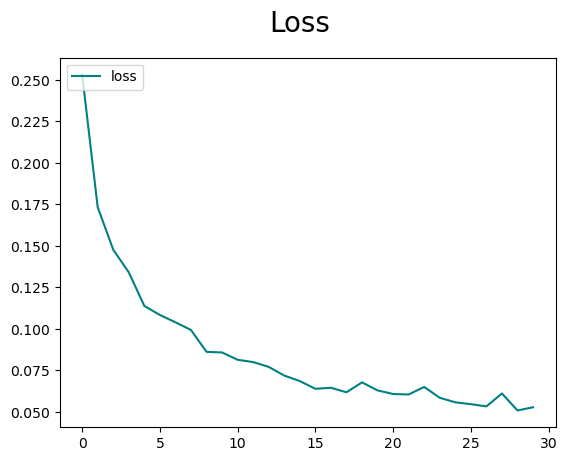

In [411]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

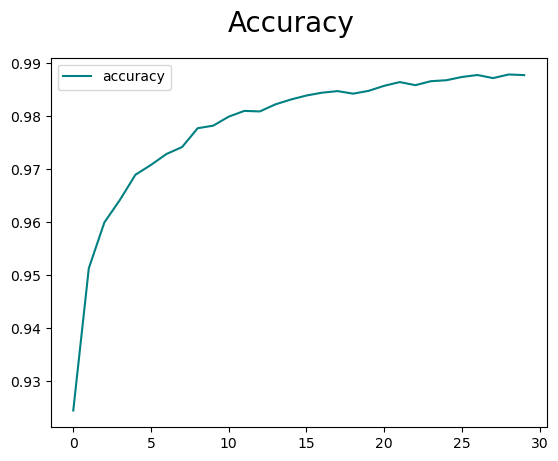

In [412]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [413]:
model.save(os.path.join('model','digits.h5'))

In [414]:
new_model = load_model(os.path.join('model','digits.h5'))

In [415]:
loss,accuracy = new_model.evaluate(x_test, y_test)
print("Loss:", loss),
print("Accuracy:", accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.2508 - accuracy: 0.9610
Loss: 0.25083351135253906
Accuracy: 0.9610000252723694


TypeError: 'NoneType' object is not subscriptable

<Figure size 640x480 with 0 Axes>